In [2]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import preprocessing
from kneed import KneeLocator


In [119]:
glass = pd.read_csv('project3-normalized-removedoutliers.arff.csv')

In [120]:
glass.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [121]:
glass.drop('Type',axis='columns', inplace=True)

In [122]:
print(glass.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.430990  0.369748  0.779510  0.320463  0.645688  0.363636  0.539580   
1  0.333333  0.237395  0.783964  0.409266  0.613054  0.323864  0.500808   
2  0.430990  0.457983  0.775056  0.432432  0.554779  0.335227  0.484653   
3  0.109375  0.707983  0.387528  0.482625  1.000000  0.000000  0.348950   
4  0.341146  0.361345  0.634744  0.444015  0.701632  0.323864  0.542811   

         Ba        Fe  
0  0.000000  0.000000  
1  0.000000  0.000000  
2  0.000000  0.000000  
3  0.000000  0.000000  
4  0.038194  0.594595  


In [123]:
#glass['Type'] = pd.factorize(glass['Type'])[0] + 1

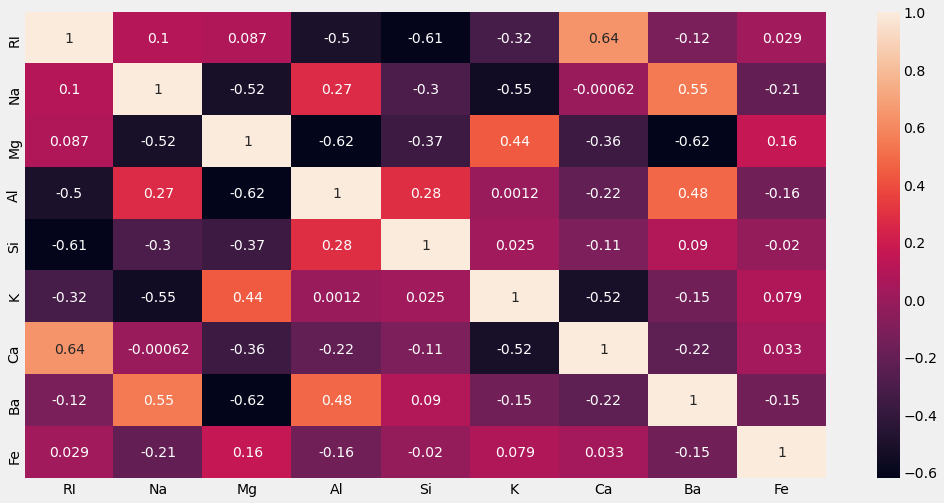

In [124]:
corrMatrix = glass.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [129]:
kmeans.fit(glass)

#The lowest SSE value
kmeans.inertia_

#Final location of the centroid
kmeans.cluster_centers_

#the number of iterations required to converge
kmeans.n_iter_


14

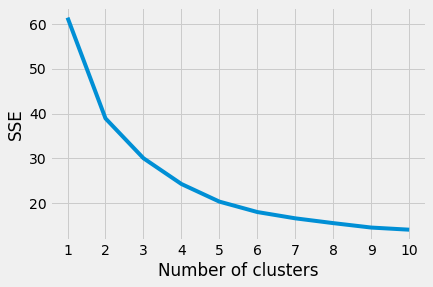

In [130]:
#Elbow aðferð til að finna besta k
kmeans_kwargs = {
        "init": "random",
        "n_init":10,
        "max_iter":300,
        "random_state": None,
        }


SSE = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(glass)
    SSE.append(kmeans.inertia_)
    

plt.style.use("fivethirtyeight")
plt.plot(range(1,11), SSE)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [128]:
#Find the elbow
kl = KneeLocator(
        range(1,11), SSE, curve ="convex", direction="decreasing"
        )
kl.elbow

4

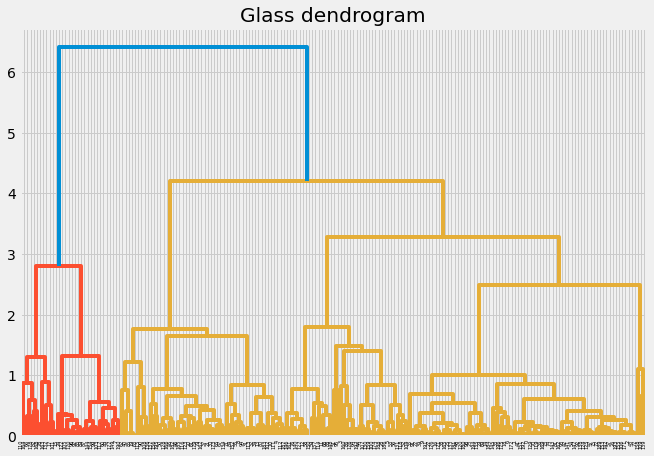

In [133]:
import scipy.cluster.hierarchy as shc
#Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Glass dendrogram")
dend = shc.dendrogram(shc.linkage(glass, method='ward'))

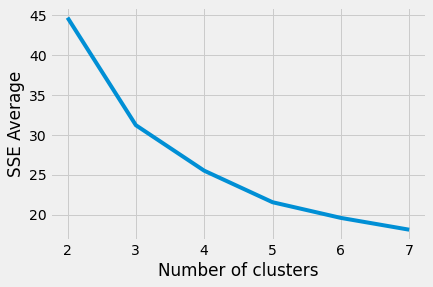

In [19]:
SSEavg = [44.73, 31.22, 25.51, 21.55, 19.58, 18.10]
clusters = [2,3,4,5,6,7]
plt.style.use("fivethirtyeight")
plt.plot(clusters, SSEavg)
plt.xlabel("Number of clusters")
plt.ylabel("SSE Average")
plt.show()


In [21]:
#Find the elbow
kl = KneeLocator(
        range(2,8), SSEavg, curve ="convex", direction="decreasing"
        )
kl.elbow

4